1. Transformers Models

2. Using Hugging Face Transformers

3. Fine tuning a pre-trained model

4. Sharing models and tokenizers

5. Datasets library

6. Tokenizers library

# Part 1 - Transformers Models

1. Pipelines

In [ ]:
from transformers import pipeline

In [ ]:
classifier = pipeline('sentiment-analysis')
classifier('Today i am very happy, as i got my favourite subject during registration')

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

[{'label': 'POSITIVE', 'score': 0.9998805522918701}]

In above default model is:

distilbert-base-uncased-finetuned-sst-2-english

**distilbert** -> transformer

**base** -> size of model

**uncased** -> does not distinguish between uppercase and lowercase i.e. case insensitive

**finetuned** -> pretrained model is further trained on specific task

**sst-2** -> dataset used (Stanford Sentiment Treebank 2)

**english** -> trained and fine-tuned on english language

In [ ]:
# Passing many sentences

classifier(['The pizza i ordered is not very tasty','I must say Iphone 16 is too good'])

[{'label': 'NEGATIVE', 'score': 0.9997910857200623},
 {'label': 'POSITIVE', 'score': 0.719441831111908}]

The model is downloaded and cached when we create the classifier object. When we rerun the classifier command, the catched model is used and there is no need to download the model again

Available Pipelines are:

1. feature-extraction (get vector representation of text)

2. fill-mask

3. ner (named entity recognition)

4. question-answering

5. sentiment-analysis

6. summarization

7. text-generation

8. translation

9. zero-shot-classification

# Zero-shot Classification

In [ ]:
classifier = pipeline('zero-shot-classification')
classifier(
    'We are now going to learn the basics of Science and Tech',
    candidate_labels = ['education','politics','movie']
)

No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

{'sequence': 'We are now going to learn the basics of Science and Tech',
 'labels': ['education', 'movie', 'politics'],
 'scores': [0.9612913131713867, 0.026830321177840233, 0.011878376826643944]}

In [ ]:
classifier(
    'PM modi might be winning next year elections in India',
    candidate_labels = ['education','politics','movie']
)

{'sequence': 'PM modi might be winning next yera elections in India',
 'labels': ['politics', 'movie', 'education'],
 'scores': [0.9771764874458313, 0.01453210785984993, 0.008291351608932018]}

# Text Generation

In [ ]:
generator = pipeline("text-generation")

No model was supplied, defaulted to gpt2 and revision 6c0e608 (https://huggingface.co/gpt2).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [ ]:
generator('We will learn')

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'We will learn what the next big challenge is going to be," he said. "And we\'re going to continue our search for the right combination to do it on the right course."\n\nBartley has not made an official decision on replacing'}]

In order to control how many different sequences are to be generated -> **num_return_sequences**

In order ot control text length -> **max_length**

# Using any model

In [ ]:
generator = pipeline("text-generation", model="distilgpt2")
generator(
    "In this course, we will teach you how to",
    max_length=30,
    num_return_sequences=2,
)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': "In this course, we will teach you how to set up an app on your own device.\n\n\n\nHere's what I mean here:"},
 {'generated_text': "In this course, we will teach you how to use a Raspberry Pi.\n\n\n\nHere's the video –\nVideo\nIn this course"}]

For different models visit -> https://huggingface.co/models

# Mask Filling

In [ ]:
unmasker = pipeline('fill-mask')

No model was supplied, defaulted to distilroberta-base and revision ec58a5b (https://huggingface.co/distilroberta-base).
Using a pipeline without specifying a model name and revision in production is not recommended.
Some weights of the model checkpoint at distilroberta-base were not used when initializing RobertaForMaskedLM: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
- This IS expected if you are initializing RobertaForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
unmasker('Joe biden is <mask> of America',top_k = 3)

[{'score': 0.27259787917137146,
  'token': 394,
  'token_str': ' president',
  'sequence': 'Joe biden is president of America'},
 {'score': 0.24377791583538055,
  'token': 1324,
  'token_str': ' CEO',
  'sequence': 'Joe biden is CEO of America'},
 {'score': 0.20190788805484772,
  'token': 270,
  'token_str': ' President',
  'sequence': 'Joe biden is President of America'}]

# Named Entity Recognition

In [ ]:
ner = pipeline("ner", grouped_entities=True)
# grouped_entities = True, for example we are considering a sentence which contains the word "Hugging face", so our model will consider "Hugging Face"
# an organization and will not treat both words differently. We even sometimes split the words.

No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english and revision f2482bf (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/998 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.33G [00:00<?, ?B/s]

Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/60.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/pipelines/token_classification.py:169: UserWarning: `grouped_entities` is deprecated and will be removed in version v5.0.0, defaulted to `aggregation_strategy="simple"` instead.
  warnings.warn(


In [ ]:
ner('Elon Musk owns SpaceX and Tesla. In the upcoming yrs, ISRO will be far ahead of NASA')

[{'entity_group': 'PER',
  'score': 0.94023556,
  'word': 'Elon Musk',
  'start': 0,
  'end': 9},
 {'entity_group': 'ORG',
  'score': 0.9980836,
  'word': 'SpaceX',
  'start': 15,
  'end': 21},
 {'entity_group': 'ORG',
  'score': 0.9906844,
  'word': 'Tesla',
  'start': 26,
  'end': 31},
 {'entity_group': 'ORG',
  'score': 0.9987472,
  'word': 'ISRO',
  'start': 54,
  'end': 58},
 {'entity_group': 'ORG',
  'score': 0.99861956,
  'word': 'NASA',
  'start': 80,
  'end': 84}]

# Question Answering

In [ ]:
question_answerer = pipeline("question-answering")

No model was supplied, defaulted to distilbert-base-cased-distilled-squad and revision 626af31 (https://huggingface.co/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/473 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/261M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

In [ ]:
question_answerer(
    question="Which two organizations calculates the net worth of Elon musk?",
    context="Elon Reeve Musk (/ˈiːlɒn/ EE-lon; born June 28, 1971) is a businessman and investor. He is the wealthiest person in the world, with an estimated net worth of US$222 billion as of December 2023, according to the Bloomberg Billionaires Index, and $244 billion according to Forbes, primarily from his ownership stakes in Tesla and SpaceX.[5][6] He is the founder, chairman, CEO, and chief technology officer of SpaceX; angel investor, CEO, product architect and former chairman of Tesla, Inc.; owner, chairman and CTO of X Corp.; founder of the Boring Company and xAI; co-founder of Neuralink and OpenAI; and president of the Musk Foundation.",
)

{'score': 0.5858657360076904,
 'start': 211,
 'end': 277,
 'answer': 'Bloomberg Billionaires Index, and $244 billion according to Forbes'}

# Summarization

In [ ]:
summarizer = pipeline("summarization")

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/1.80k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

In [ ]:
summarizer(
    """
    In the quiet town of Eldridge, where time seemed to move at a leisurely pace, lived an elderly woman named Evelyn. Her days were spent cultivating a vibrant garden that bloomed with memories of seasons past. Yet, every evening, Evelyn would embark on a secret journey.

Guided by the soft glow of her lantern, she navigated a hidden path into the heart of the neighboring woods. There, in a moonlit clearing, stood a majestic tree with branches that seemed to whisper ancient secrets. At its roots lay a weathered book.

Evelyn would open the book and chant words unknown to the townsfolk. The tree responded with a gentle dance, leaves rustling in harmony. Unbeknownst to the villagers, Evelyn's ritual was a pact to protect Eldridge from an old curse. The magic woven into her words maintained prosperity and harmony.

Sensing her advancing age, Evelyn chose to reveal her secret to Lily, a curious young neighbor. Entrusting Lily with the ancient book, Evelyn passed on the sacred duty. As the new guardian, Lily continued the nightly ritual, ensuring that Eldridge remained a haven of enchantment for generations to come.
"""
)

[{'summary_text': ' Evelyn, an elderly woman in the town of Eldridge, was entrusted with a ritual to protect the town from an old curse . Evelyn would open the book and chant words unknown to the townsfolk . The magic woven into her words maintained prosperity and harmony for generations to come .'}]

We can even specify max and min length.

# Translation

In [ ]:
!pip install sentencepiece

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 6.7 MB/s eta 0:00:00


In [ ]:
translator = pipeline("translation", model="Helsinki-NLP/opus-mt-fr-en")

In [ ]:
translator("Ce cours est produit par Hugging Face.")

[{'translation_text': 'This course is produced by Hugging Face.'}]


# Encoders and Decoders
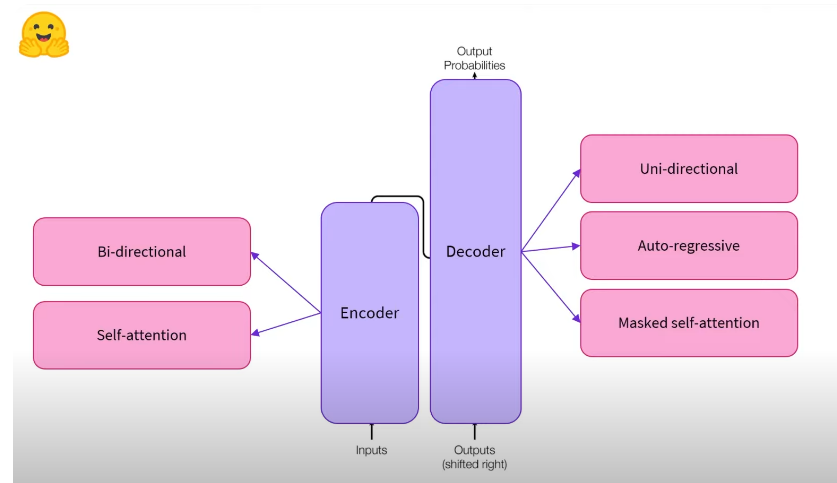

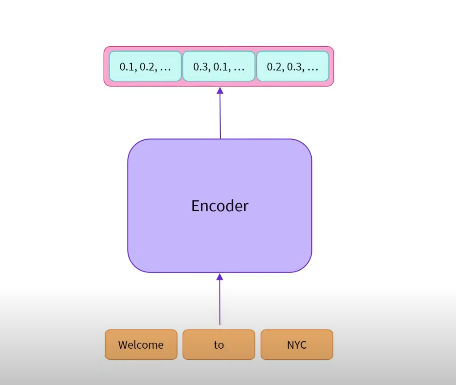

The encoder outputs a numerical representation for each word used as input.

This numerical representation is a vector of 768 dimension (if we consider BERT).

This numerical representation represents the word contextualized to the text.

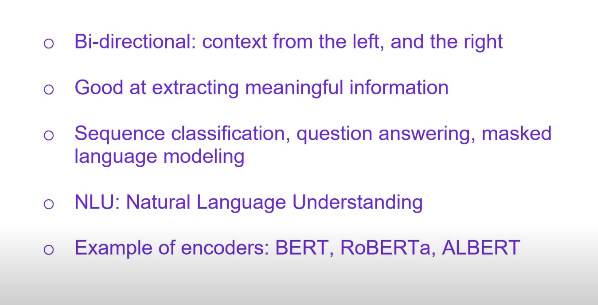

Decoders are similar to encoders

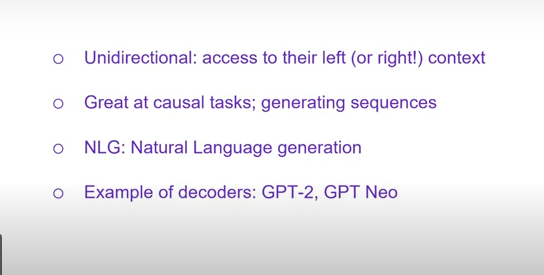



# Understanding Seq2Seq models

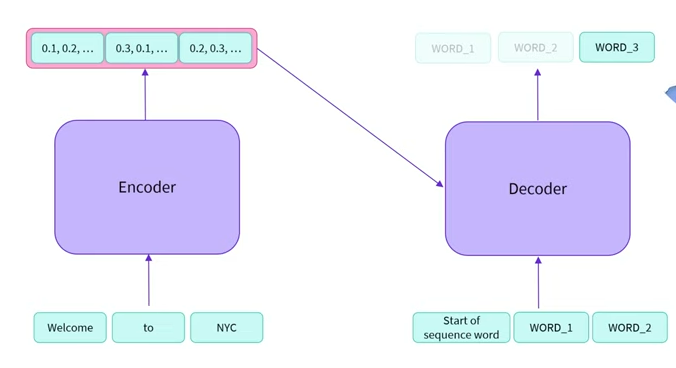

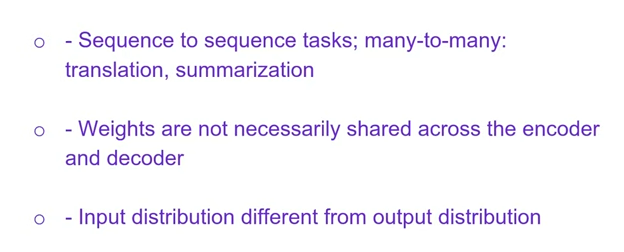

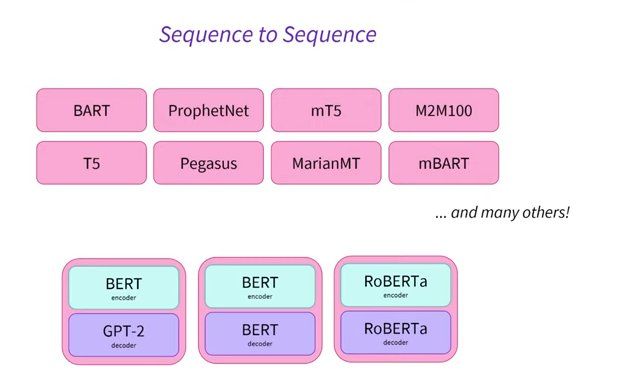

# Part 2 - Using Hugging Face Transformers

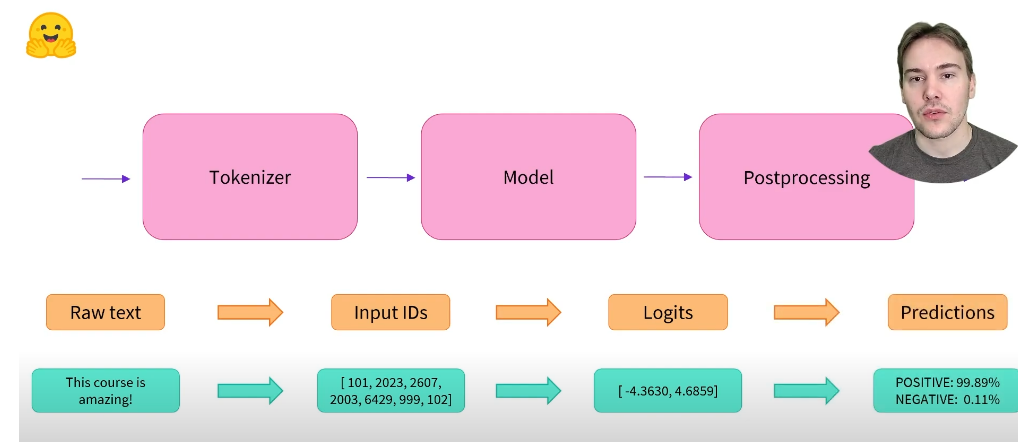

# Tokenizer

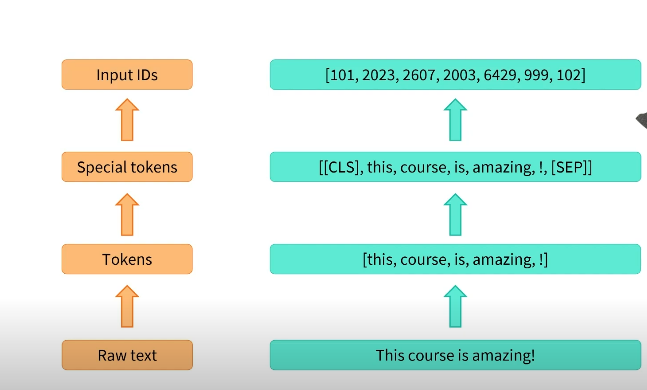

In [ ]:
from transformers import AutoTokenizer

In [ ]:
checkpoint = 'distilbert-base-uncased-finetuned-sst-2-english'
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [ ]:
raw_inputs = [
    "I've been waiting for a HuggingFace course my whole life",
    "I hate so much"
]

In [ ]:
inputs = tokenizer(raw_inputs,padding=True,truncation=True,return_tensors="pt")

In [ ]:
inputs

{'input_ids': tensor([[  101,  1045,  1005,  2310,  2042,  3403,  2005,  1037, 17662, 12172,
          2607,  2026,  2878,  2166,   102],
        [  101,  1045,  5223,  2061,  2172,   102,     0,     0,     0,     0,
             0,     0,     0,     0,     0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]])}

In [ ]:
# Will pad the sequences up to the maximum sequence length
model_inputs1 = tokenizer(raw_inputs, padding="longest")

# Will pad the sequences up to the model max length
# (512 for BERT or DistilBERT)
model_inputs2 = tokenizer(raw_inputs, padding="max_length")

# Will pad the sequences up to the specified max length
model_inputs3 = tokenizer(raw_inputs, padding="max_length", max_length=8)

In [ ]:
print(model_inputs1)
print(model_inputs2)
print(model_inputs3)

{'input_ids': [[101, 1045, 1005, 2310, 2042, 3403, 2005, 1037, 17662, 12172, 2607, 2026, 2878, 2166, 102], [101, 1045, 5223, 2061, 2172, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]]}
{'input_ids': [[101, 1045, 1005, 2310, 2042, 3403, 2005, 1037, 17662, 12172, 2607, 2026, 2878, 2166, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

Three different algorithms
1. Word based
2. Character based
3. Subword based

# Word based
Text is splitted into words on the basis of spaces, punctuation etc.

Each word has a specific id.

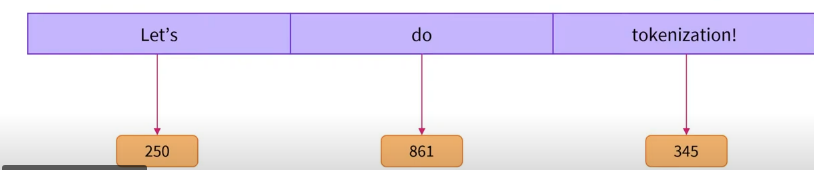

Limitations :

1. Very similar words have entirely different meanings. For examples, two words 'dog' and 'dogs' will be assigned different tokens, instead they should be assigned with same token

2. The vocabulary can end up very large.

3. Out of vocabulary words result in a loss of information.

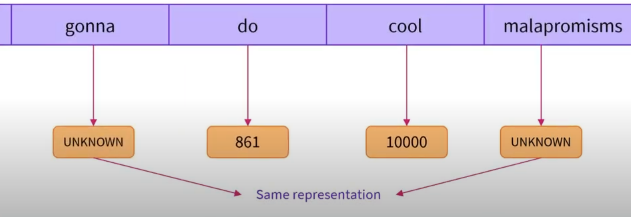

# Character Based

Splitting a raw text into characters.

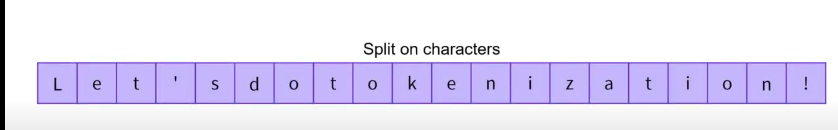

Benefits:

1. We would need a very large dictionary to encompass all words. With a character-based vocabulary, we can get by with only 256 characters.

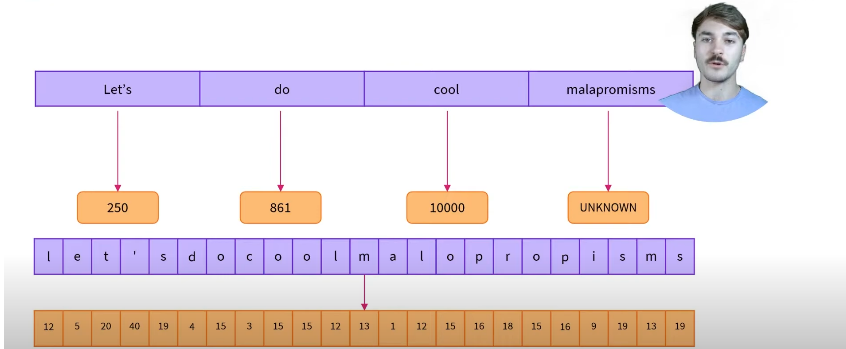

2. Out of vocabulary tokens will be less frequent.

Limitations:

1. A character does not hold as much info individually as a word hold.

2. Size of the context model will carry around.


# SubWord based Tokenizers

Splitting a raw text into subwords

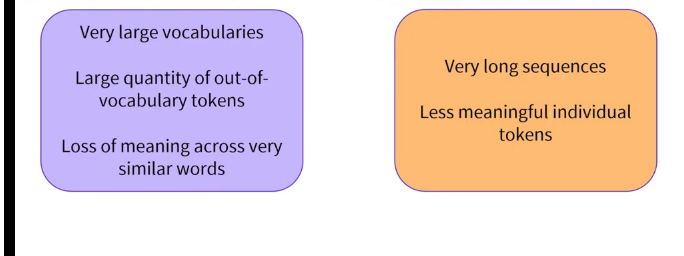

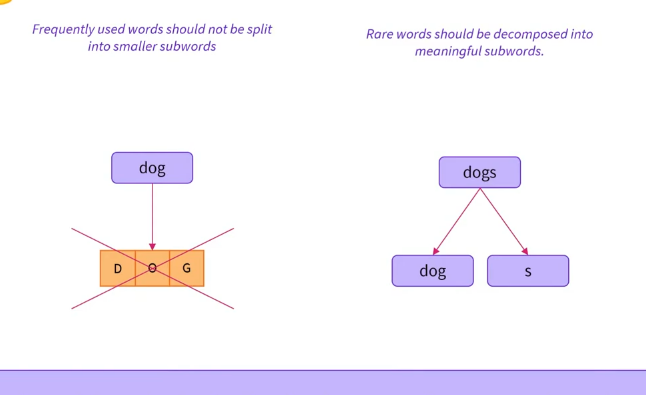

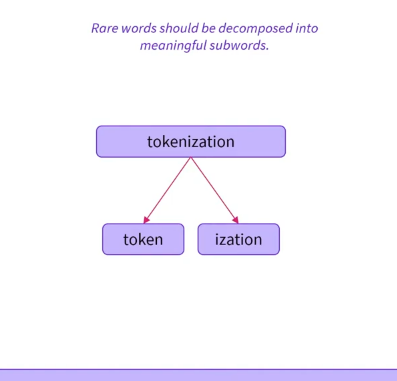

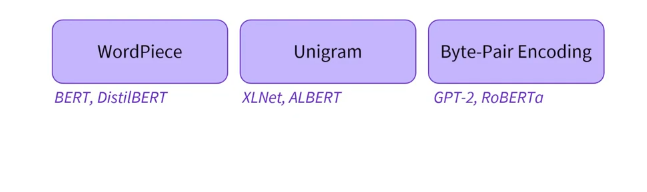



# Tokenization pipeline

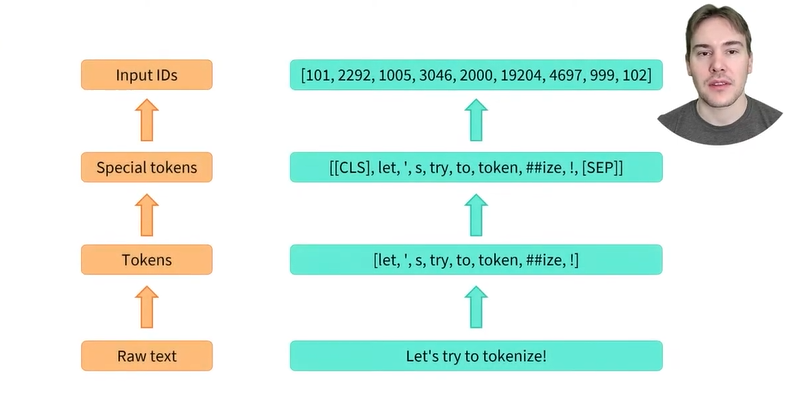



In [ ]:
from transformers import AutoTokenizer

In [ ]:
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')
tokens = tokenizer.tokenize("Let's try to tokenize!")
print(tokens)

tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

['let', "'", 's', 'try', 'to', 'token', '##ize', '!']


In [ ]:
tokenizer = AutoTokenizer.from_pretrained('albert-base-v1')
tokens = tokenizer.tokenize("Let's try to tokenize!")
print(tokens)

['▁let', "'", 's', '▁try', '▁to', '▁to', 'ken', 'ize', '!']


In [ ]:
input_ids1 = tokenizer.convert_tokens_to_ids(tokens)
print(input_ids1)

[408, 22, 18, 1131, 20, 20, 2853, 2952, 187]


In [ ]:
final_inputs1 = tokenizer.prepare_for_model(input_ids1)
print(final_inputs1['input_ids'])

You're using a AlbertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


[2, 408, 22, 18, 1131, 20, 20, 2853, 2952, 187, 3]


In [ ]:
sequence = "I've been waiting for a HuggingFace course my whole life."

model_inputs = tokenizer(sequence)
print(model_inputs["input_ids"])

tokens = tokenizer.tokenize(sequence)
ids = tokenizer.convert_tokens_to_ids(tokens)
print(ids)

[2, 31, 22, 195, 74, 1672, 26, 21, 20676, 6413, 674, 51, 979, 201, 9, 3]
[31, 22, 195, 74, 1672, 26, 21, 20676, 6413, 674, 51, 979, 201, 9]


In [ ]:
print(tokenizer.decode(model_inputs["input_ids"]))
print(tokenizer.decode(ids))
print(tokenizer.decode(final_inputs1['input_ids']))

[CLS] i've been waiting for a huggingface course my whole life.[SEP]
i've been waiting for a huggingface course my whole life.
[CLS] let's try to tokenize![SEP]


# Model

In [ ]:
from transformers import AutoModelForSequenceClassification

In [ ]:
model = AutoModelForSequenceClassification.from_pretrained(checkpoint)

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

In [ ]:
outputs = model(**inputs)
print(outputs.logits)

tensor([[-1.4683,  1.5105],
        [ 4.1692, -3.3464]], grad_fn=<AddmmBackward0>)


In [ ]:
from transformers import AutoModel

In [ ]:
bert_model = AutoModel.from_pretrained('bert-base-cased')
print(type(bert_model))
gpt_model = AutoModel.from_pretrained('gpt2')
print(type(gpt_model))
bart_model = AutoModel.from_pretrained('facebook/bart-base')
print(type(bart_model))

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/436M [00:00<?, ?B/s]

<class 'transformers.models.bert.modeling_bert.BertModel'>


config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

<class 'transformers.models.gpt2.modeling_gpt2.GPT2Model'>


config.json:   0%|          | 0.00/1.72k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/558M [00:00<?, ?B/s]

<class 'transformers.models.bart.modeling_bart.BartModel'>


In [ ]:
from transformers import AutoConfig

In [ ]:
bert_config = AutoConfig.from_pretrained('bert-base-cased')
print(type(bert_config))
gpt_config = AutoConfig.from_pretrained('gpt2')
print(type(gpt_config))
bart_config = AutoConfig.from_pretrained('facebook/bart-base')
print(type(bart_config))

<class 'transformers.models.bert.configuration_bert.BertConfig'>
<class 'transformers.models.gpt2.configuration_gpt2.GPT2Config'>
<class 'transformers.models.bart.configuration_bart.BartConfig'>


Let's see bert model

In [ ]:
from transformers import BertConfig,BertModel

In [ ]:
bert_config = BertConfig.from_pretrained('bert-base-cased')
print(bert_config)

BertConfig {
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.35.2",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 28996
}



In [ ]:
bert_model = BertModel(bert_config)

We can even use different number of layers

In [ ]:
bert_config = BertConfig.from_pretrained('bert-base-cased',num_hidden_layers=10)
bert_model = BertModel(bert_config)

In [ ]:
print(bert_config)

BertConfig {
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 10,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.35.2",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 28996
}



Saving a model

In [ ]:
bert_model.save_pretrained('my_bert_model')

Reloading a saved model

In [ ]:
bert_model = BertModel.from_pretrained('my_bert_model')

# Postprocessing

In [ ]:
import torch

In [ ]:
predictions = torch.nn.functional.softmax(outputs.logits,dim=-1)
print(predictions)

tensor([[4.8393e-02, 9.5161e-01],
        [9.9946e-01, 5.4418e-04]], grad_fn=<SoftmaxBackward0>)


In [ ]:
model.config.id2label

{0: 'NEGATIVE', 1: 'POSITIVE'}

tensor([[4.8393e-02, 9.5161e-01],
        [9.9946e-01, 5.4418e-04]])
    
For first sentence Negative = 4.02% and positive = 95.98%

For second sentence Negative = 99.46% and positive = 0.54%

# Part 3 - Fine tuning a pretrained model

# Loading a dataset from the Hub

In [ ]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 507.1/507.1 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 7.5 MB/s eta 0:00:00


In [ ]:
from datasets import load_dataset

In [ ]:
raw_datasets = load_dataset('glue','mrpc')
# GLUE is a benchmark that encompasses a collection of diverse natural language understanding tasks.
# MRPC is one of the datasets within the GLUE benchmark, specifically addressing paraphrase detection.
raw_datasets

DatasetDict({
    train: Dataset({
        features: ['sentence1', 'sentence2', 'label', 'idx'],
        num_rows: 3668
    })
    validation: Dataset({
        features: ['sentence1', 'sentence2', 'label', 'idx'],
        num_rows: 408
    })
    test: Dataset({
        features: ['sentence1', 'sentence2', 'label', 'idx'],
        num_rows: 1725
    })
})

In [ ]:
raw_datasets['train'][5]

{'sentence1': 'Revenue in the first quarter of the year dropped 15 percent from the same period a year earlier .',
 'sentence2': "With the scandal hanging over Stewart 's company , revenue the first quarter of the year dropped 15 percent from the same period a year earlier .",
 'label': 1,
 'idx': 5}

In [ ]:
raw_datasets['train'].features

{'sentence1': Value(dtype='string', id=None),
 'sentence2': Value(dtype='string', id=None),
 'label': ClassLabel(names=['not_equivalent', 'equivalent'], id=None),
 'idx': Value(dtype='int32', id=None)}

In [ ]:
print(raw_datasets.column_names)

{'train': ['sentence1', 'sentence2', 'label', 'idx'], 'validation': ['sentence1', 'sentence2', 'label', 'idx'], 'test': ['sentence1', 'sentence2', 'label', 'idx']}


Browse datasets : https://huggingface.co/datasets

In [ ]:
from datasets import load_dataset
from transformers import AutoTokenizer, DataCollatorWithPadding

raw_datasets = load_dataset("glue", "mrpc")
checkpoint = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

print(raw_datasets)

def tokenize_function(example):
    return tokenizer(example["sentence1"], example["sentence2"], truncation=True)


tokenized_datasets = raw_datasets.map(tokenize_function, batched=True)

# dynamic padding
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

DatasetDict({
    train: Dataset({
        features: ['sentence1', 'sentence2', 'label', 'idx'],
        num_rows: 3668
    })
    validation: Dataset({
        features: ['sentence1', 'sentence2', 'label', 'idx'],
        num_rows: 408
    })
    test: Dataset({
        features: ['sentence1', 'sentence2', 'label', 'idx'],
        num_rows: 1725
    })
})


Map:   0%|          | 0/408 [00:00<?, ? examples/s]

In [ ]:
tokenized_datasets

DatasetDict({
    train: Dataset({
        features: ['sentence1', 'sentence2', 'label', 'idx', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 3668
    })
    validation: Dataset({
        features: ['sentence1', 'sentence2', 'label', 'idx', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 408
    })
    test: Dataset({
        features: ['sentence1', 'sentence2', 'label', 'idx', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 1725
    })
})

In [ ]:
tokenized_datasets = tokenized_datasets.remove_columns(["sentence1", "sentence2", "idx"])
tokenized_datasets = tokenized_datasets.rename_column("label", "labels")
tokenized_datasets.set_format("torch")
tokenized_datasets["train"].column_names

['labels', 'input_ids', 'token_type_ids', 'attention_mask']

# Training

In [ ]:
!pip install transformers[torch]>=4.0.0 accelerate>=0.20.1

In [ ]:
from transformers import TrainingArguments

# contains all the hyperparameters used for training and evaluation
training_args = TrainingArguments("test-trainer")

In [ ]:
from transformers import AutoModelForSequenceClassification

model = AutoModelForSequenceClassification.from_pretrained(checkpoint, num_labels=2)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
from transformers import Trainer

def compute_metrics(eval_preds):
    metric = evaluate.load("glue", "mrpc")
    logits, labels = eval_preds
    predictions = np.argmax(logits, axis=-1)
    return metric.compute(predictions=predictions, references=labels)

trainer = Trainer(
    model,
    training_args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["validation"],
    data_collator=data_collator,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
)

In [ ]:
trainer.train() # used for fine tuning

TrainOutput(global_step=1377, training_loss=0.32426782855973696, metrics={'train_runtime': 200.7015, 'train_samples_per_second': 54.828, 'train_steps_per_second': 6.861, 'total_flos': 405626802939840.0, 'train_loss': 0.32426782855973696, 'epoch': 3.0})

In [ ]:
predictions = trainer.predict(tokenized_datasets["validation"])
print(predictions.predictions.shape, predictions.label_ids.shape)

(408, 2) (408,)


In [ ]:
import numpy as np

preds = np.argmax(predictions.predictions, axis=-1)

In [ ]:
preds

array([1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,

In [ ]:
!pip install evaluate

In [ ]:
import evaluate

metric = evaluate.load("glue", "mrpc")
metric.compute(predictions=preds, references=predictions.label_ids)

{'accuracy': 0.8799019607843137, 'f1': 0.9150779896013865}

# Without using Trainer class

In [ ]:
tokenized_datasets

DatasetDict({
    train: Dataset({
        features: ['labels', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 3668
    })
    validation: Dataset({
        features: ['labels', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 408
    })
    test: Dataset({
        features: ['labels', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 1725
    })
})

In [ ]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(
    tokenized_datasets["train"], shuffle=True, batch_size=8, collate_fn=data_collator
)
eval_dataloader = DataLoader(
    tokenized_datasets["validation"], batch_size=8, collate_fn=data_collator
)

To quickly check there is no mistake in the data processing, we can inspect a batch like this:

In [ ]:
for batch in train_dataloader:
    break
{k: v.shape for k, v in batch.items()}

{'labels': torch.Size([8]),
 'input_ids': torch.Size([8, 59]),
 'token_type_ids': torch.Size([8, 59]),
 'attention_mask': torch.Size([8, 59])}

Now we are finished with data preprocessing

In [ ]:
from transformers import AutoModelForSequenceClassification

model = AutoModelForSequenceClassification.from_pretrained(checkpoint, num_labels=2)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
outputs = model(**batch)
print(outputs.loss, outputs.logits.shape)
print(outputs)

tensor(0.1260, device='cuda:0', grad_fn=<NllLossBackward0>) torch.Size([8, 2])
SequenceClassifierOutput(loss=tensor(0.1260, device='cuda:0', grad_fn=<NllLossBackward0>), logits=tensor([[ 1.3052, -2.3919],
        [-2.3852,  3.7226],
        [-1.1022,  2.0719],
        [ 1.4162, -2.4386],
        [ 0.4378,  0.2930],
        [-2.4396,  3.7832],
        [ 0.9450, -0.9474],
        [-1.6794,  3.0825]], device='cuda:0', grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)


In [ ]:
from transformers import AdamW
from accelerate import Accelerator

optimizer = AdamW(model.parameters(), lr=3e-5)
accelerator = Accelerator()

In [ ]:
train_dataloader, eval_dataloader, model, optimizer = accelerator.prepare(
    train_dataloader, eval_dataloader, model, optimizer
)

In [ ]:
from transformers import get_scheduler

num_epochs = 3
num_training_steps = num_epochs * len(train_dataloader)
lr_scheduler = get_scheduler(
    "linear",
    optimizer=optimizer,
    num_warmup_steps=0,
    num_training_steps=num_training_steps,
)
print(num_training_steps)

1377


In [ ]:
from tqdm.auto import tqdm

progress_bar = tqdm(range(num_training_steps))

model.train()
for epoch in range(num_epochs):
    for batch in train_dataloader:
        outputs = model(**batch)
        loss = outputs.loss
        accelerator.backward(loss)

        optimizer.step()
        lr_scheduler.step()
        optimizer.zero_grad()
        progress_bar.update(1)

  0%|          | 0/1377 [00:00<?, ?it/s]

In [ ]:
import evaluate

metric = evaluate.load("glue", "mrpc")
model.eval()
for batch in eval_dataloader:
    with torch.no_grad():
        outputs = model(**batch)
    logits = outputs.logits
    predictions = torch.argmax(logits, dim=-1)
    metric.add_batch(predictions=predictions, references=batch["labels"])

metric.compute()

{'accuracy': 0.8725490196078431, 'f1': 0.9109589041095889}

# Part 4 - Sharing models and tokenizers

https://huggingface.co/learn/nlp-course/chapter4/1?fw=pt

Currently we have no models to share, so we will not explore this

# Part 5 - Datasets Library

Working with local or remote datasets

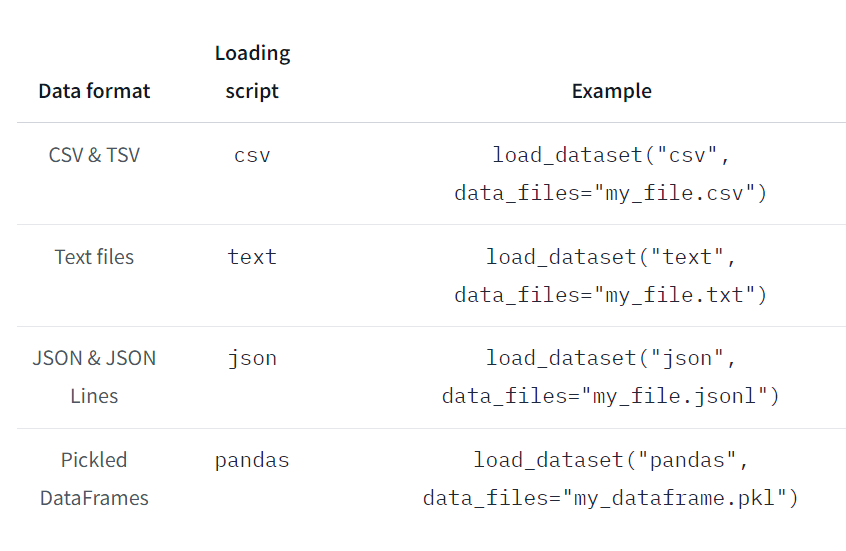

Loading a local dataset

In [ ]:
from datasets import load_dataset

dataset_ds = load_dataset("csv", data_files="/content/text_data_toc.csv")

In [ ]:
dataset_ds

DatasetDict({
    train: Dataset({
        features: ['words', 'file'],
        num_rows: 165
    })
})

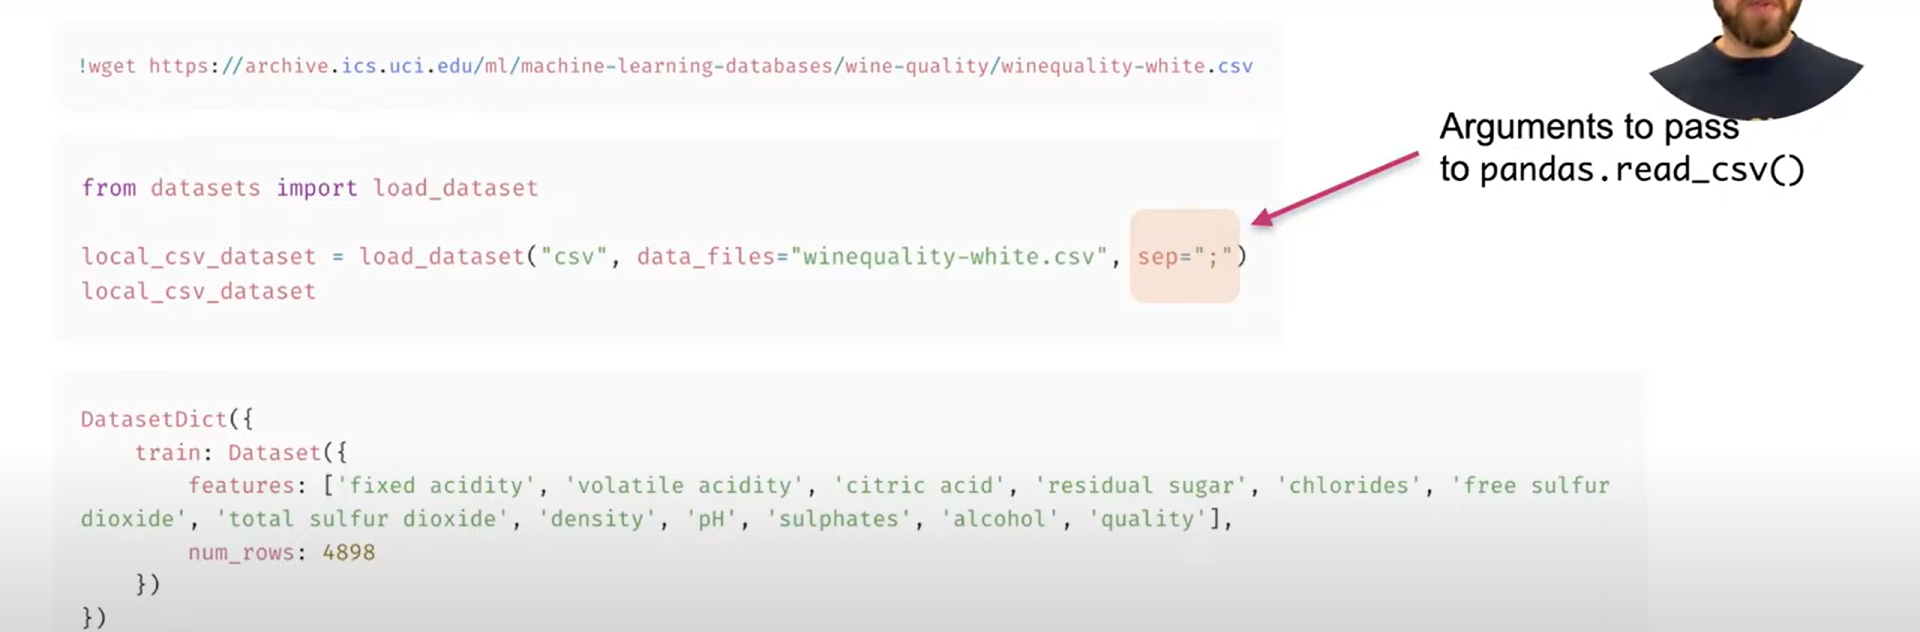

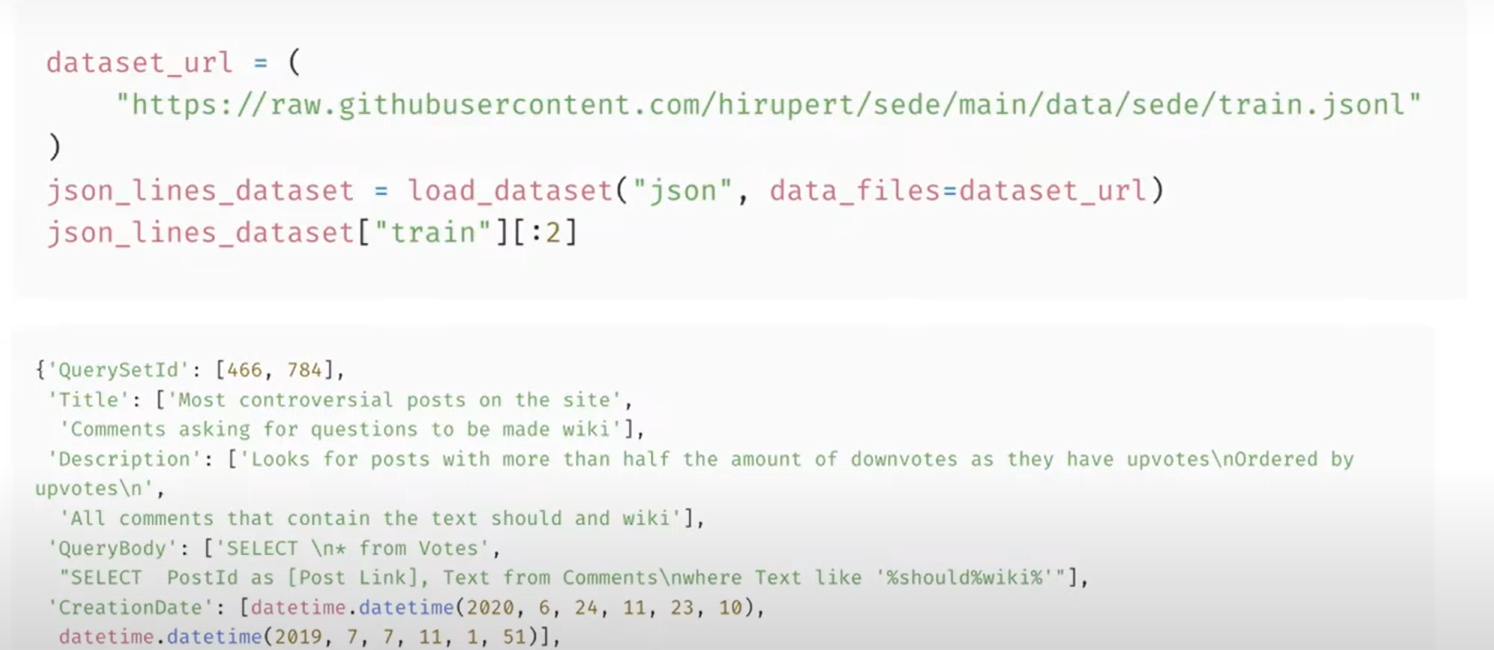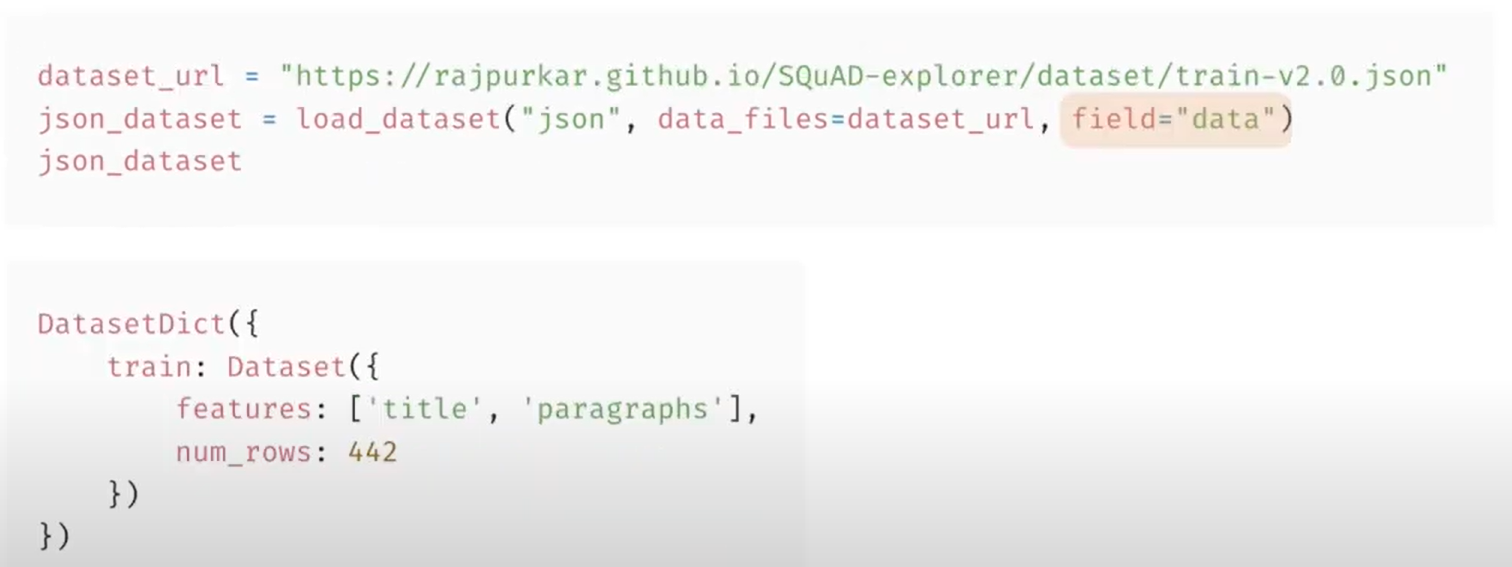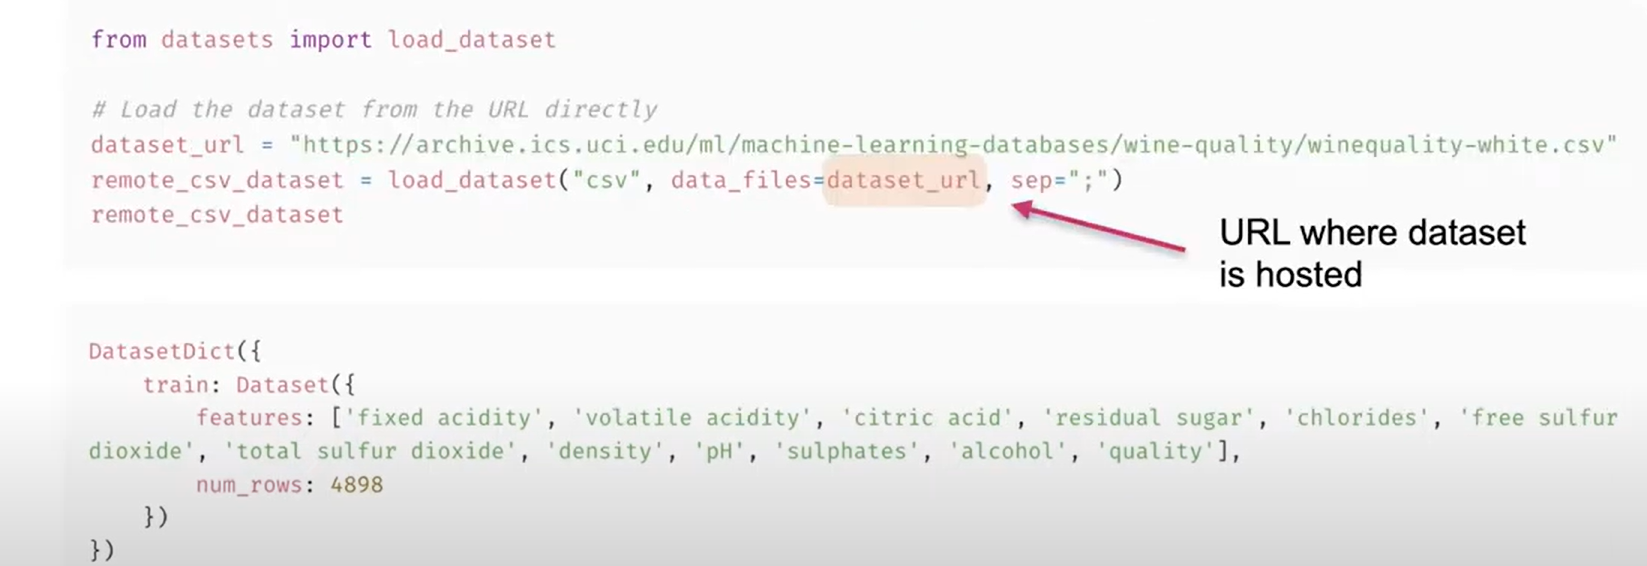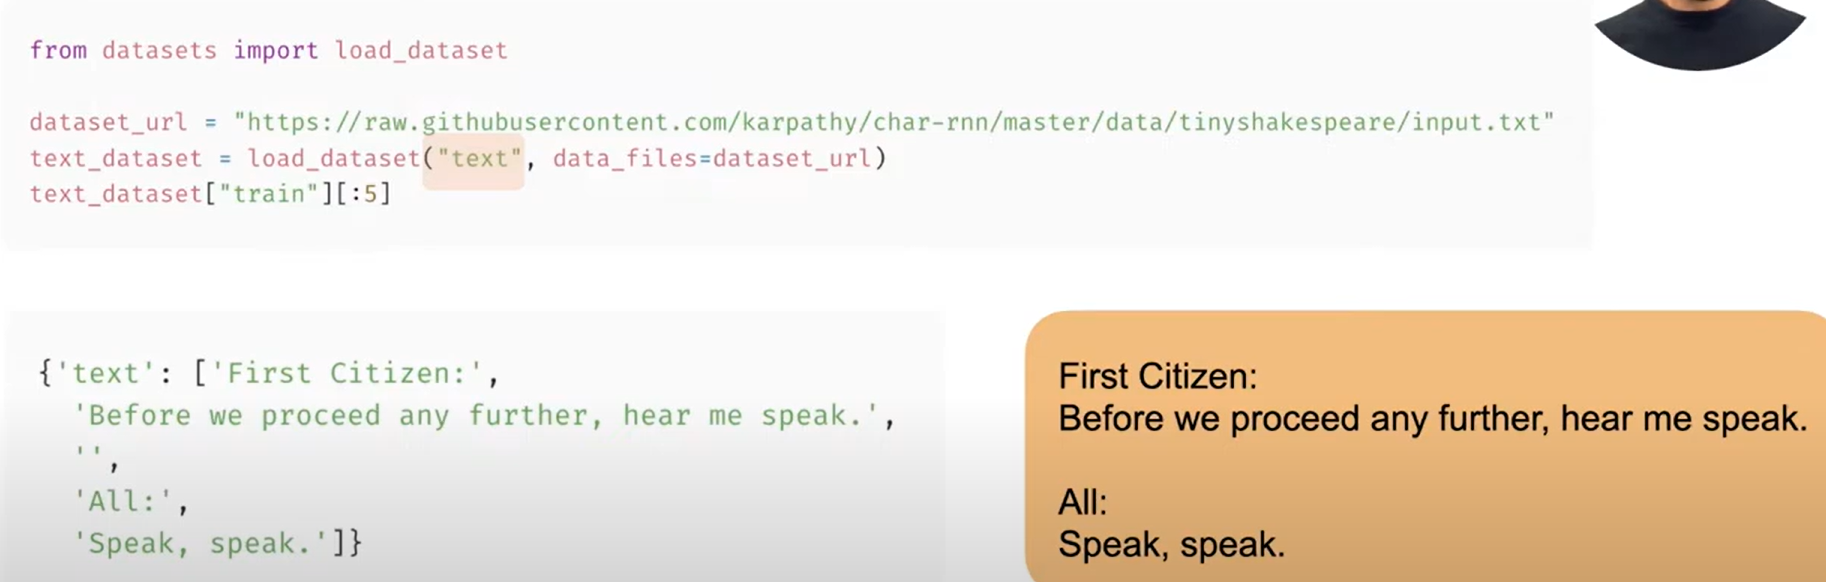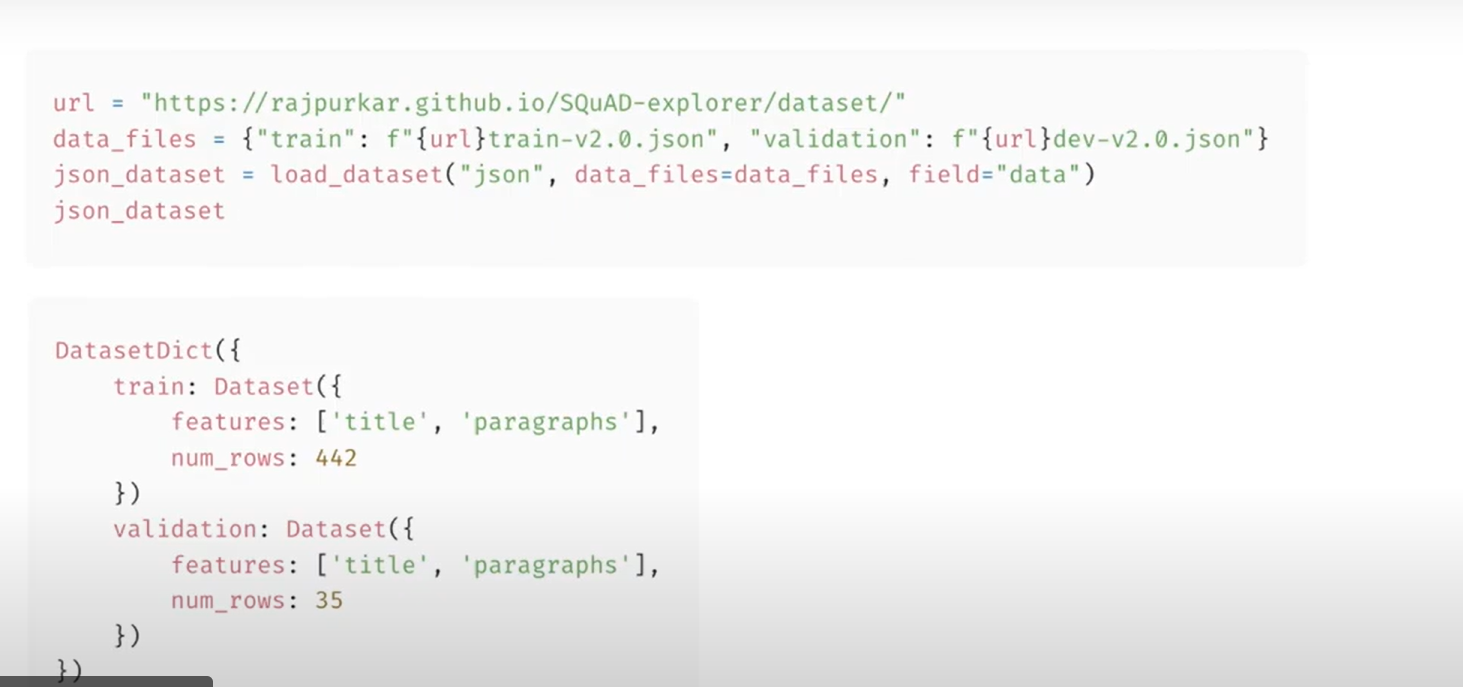

Now we will use : https://github.com/crux82/squad-it/ dataset, it is used for question answering in italian

In [ ]:
!wget https://github.com/crux82/squad-it/raw/master/SQuAD_it-train.json.gz
!wget https://github.com/crux82/squad-it/raw/master/SQuAD_it-test.json.gz
# the train test splits are hosted on github
# This will download two compressed files called SQuAD_it-train.json.gz and SQuAD_it-test.json.gz

--2023-12-24 07:38:38--  https://github.com/crux82/squad-it/raw/master/SQuAD_it-train.json.gz
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/crux82/squad-it/master/SQuAD_it-train.json.gz [following]
--2023-12-24 07:38:39--  https://raw.githubusercontent.com/crux82/squad-it/master/SQuAD_it-train.json.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7725286 (7.4M) [application/octet-stream]
Saving to: ‘SQuAD_it-train.json.gz’

SQuAD_it-train.json 100%[===================>]   7.37M  --.-KB/s    in 0.08s   

2023-12-24 07:38:39 (90.4 MB/s) - ‘SQuAD_it-train.json.gz’ saved [7725286/7725286]

--202

In [ ]:
from datasets import load_dataset

squad_it_dataset = load_dataset("json", data_files="/content/SQuAD_it-train.json.gz", field="data")

Generating train split: 0 examples [00:00, ? examples/s]

In [ ]:
squad_it_dataset # By default, loading local files creates a DatasetDict object with a train split.

DatasetDict({
    train: Dataset({
        features: ['title', 'paragraphs'],
        num_rows: 442
    })
})

In [ ]:
data_files = {"train": "/content/SQuAD_it-train.json.gz", "test": "/content/SQuAD_it-test.json.gz"}
squad_it_dataset = load_dataset("json", data_files=data_files, field="data")
squad_it_dataset

Generating train split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['title', 'paragraphs'],
        num_rows: 442
    })
    test: Dataset({
        features: ['title', 'paragraphs'],
        num_rows: 48
    })
})

Loading a remote dataset -> data stored on some remote server

In [ ]:
url = "https://github.com/crux82/squad-it/raw/master/"
data_files = {
    "train": url + "SQuAD_it-train.json.gz",
    "test": url + "SQuAD_it-test.json.gz",
}
squad_it_dataset = load_dataset("json", data_files=data_files, field="data")

Generating train split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

Note : Hugging face support automatic decompression, so there is no need of decompression

Time to slice and dice

Similar to pandas, datasets provide functions to manipulate the contents of datasets and DatasetDict object.

We will use "Drug Review Dataset" - https://www.kaggle.com/datasets/jessicali9530/kuc-hackathon-winter-2018

Download and extract data

In [ ]:
!wget "https://archive.ics.uci.edu/ml/machine-learning-databases/00462/drugsCom_raw.zip"
!unzip drugsCom_raw.zip

--2023-12-24 08:23:43--  https://archive.ics.uci.edu/ml/machine-learning-databases/00462/drugsCom_raw.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘drugsCom_raw.zip’

drugsCom_raw.zip        [     <=>            ]  41.00M  41.0MB/s    in 1.0s    

2023-12-24 08:23:44 (41.0 MB/s) - ‘drugsCom_raw.zip’ saved [42989872]

Archive:  drugsCom_raw.zip
  inflating: drugsComTest_raw.tsv    
  inflating: drugsComTrain_raw.tsv   


In [ ]:
from datasets import load_dataset

data_files = {"train": "/content/drugsComTrain_raw.tsv", "test": "/content/drugsComTest_raw.tsv"}
# \t is the tab character in Python
drug_dataset = load_dataset("csv", data_files=data_files, delimiter="\t")

In [ ]:
drug_sample = drug_dataset["train"].shuffle(seed=42).select(range(1000))
# Peek at the first few examples
drug_sample[:3]

{'Unnamed: 0': [87571, 178045, 80482],
 'drugName': ['Naproxen', 'Duloxetine', 'Mobic'],
 'condition': ['Gout, Acute', 'ibromyalgia', 'Inflammatory Conditions'],
 'review': ['"like the previous person mention, I&#039;m a strong believer of aleve, it works faster for my gout than the prescription meds I take. No more going to the doctor for refills.....Aleve works!"',
  '"I have taken Cymbalta for about a year and a half for fibromyalgia pain. It is great\r\nas a pain reducer and an anti-depressant, however, the side effects outweighed \r\nany benefit I got from it. I had trouble with restlessness, being tired constantly,\r\ndizziness, dry mouth, numbness and tingling in my feet, and horrible sweating. I am\r\nbeing weaned off of it now. Went from 60 mg to 30mg and now to 15 mg. I will be\r\noff completely in about a week. The fibro pain is coming back, but I would rather deal with it than the side effects."',
  '"I have been taking Mobic for over a year with no side effects other than 

In [ ]:
drug_dataset

DatasetDict({
    train: Dataset({
        features: ['Unnamed: 0', 'drugName', 'condition', 'review', 'rating', 'date', 'usefulCount'],
        num_rows: 161297
    })
    test: Dataset({
        features: ['Unnamed: 0', 'drugName', 'condition', 'review', 'rating', 'date', 'usefulCount'],
        num_rows: 53766
    })
})

Train test split

In [ ]:
drug_dataset1 = drug_dataset['train']
drug_dataset1

Dataset({
    features: ['Unnamed: 0', 'drugName', 'condition', 'review', 'rating', 'date', 'usefulCount'],
    num_rows: 161297
})

In [ ]:
drug_dataset1 = drug_dataset1.train_test_split(test_size=0.1)
drug_dataset1

DatasetDict({
    train: Dataset({
        features: ['Unnamed: 0', 'drugName', 'condition', 'review', 'rating', 'date', 'usefulCount'],
        num_rows: 145167
    })
    test: Dataset({
        features: ['Unnamed: 0', 'drugName', 'condition', 'review', 'rating', 'date', 'usefulCount'],
        num_rows: 16130
    })
})

Return rows according to list of indices

In [ ]:
indices = [0,10,20,30]
dd1 = load_dataset('glue','mrpc')
dd1.select(indices) # showing error

Return rows whose title startswith 'L'

In [ ]:
dd1 = load_dataset('glue','mrpc')
dd1_filtered = dd1.filter(lambda x:x['sentence1'].startswith('L'))

Filter:   0%|          | 0/3668 [00:00<?, ? examples/s]

Filter:   0%|          | 0/408 [00:00<?, ? examples/s]

Filter:   0%|          | 0/1725 [00:00<?, ? examples/s]

In [ ]:
dd1_filtered['validation'][2]

{'sentence1': 'Lord Falconer hailed the changes as " a new beginning as far as the courts , Crown Prosecution Service and police are concerned " .',
 'sentence2': '" It \'s a new beginning as far as the courts , Crown Prosecution Service and police are concerned , making the criminal justice system work better . "',
 'label': 0,
 'idx': 1660}

Renaming Column

In [ ]:
drug_dataset = drug_dataset.rename_column(
    original_column_name="Unnamed: 0", new_column_name="patient_id"
)
drug_dataset

DatasetDict({
    train: Dataset({
        features: ['patient_id', 'drugName', 'condition', 'review', 'rating', 'date', 'usefulCount'],
        num_rows: 161297
    })
    test: Dataset({
        features: ['patient_id', 'drugName', 'condition', 'review', 'rating', 'date', 'usefulCount'],
        num_rows: 53766
    })
})

Remove columns

In [ ]:
dd1 = load_dataset('glue','mrpc')
dd1 = dd1.remove_columns(['idx','label'])
dd1

DatasetDict({
    train: Dataset({
        features: ['sentence1', 'sentence2'],
        num_rows: 3668
    })
    validation: Dataset({
        features: ['sentence1', 'sentence2'],
        num_rows: 408
    })
    test: Dataset({
        features: ['sentence1', 'sentence2'],
        num_rows: 1725
    })
})

Flatten

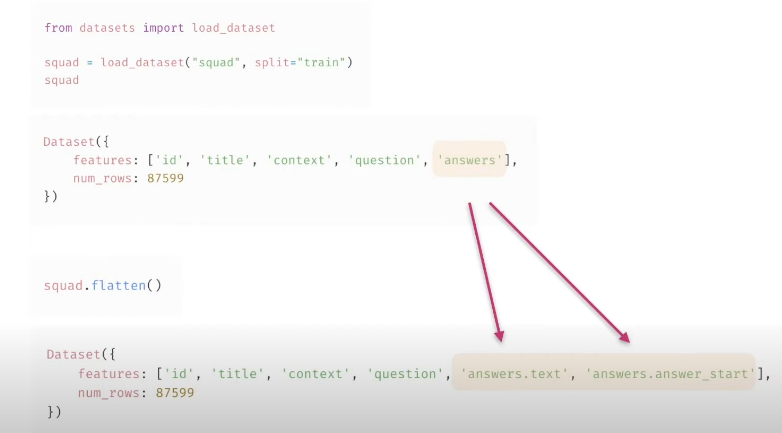

Lowercasing

In [ ]:
def lowercase_condition(example):
    return {"condition": example["condition"].lower()}

drug_dataset = drug_dataset.filter(lambda x: x["condition"] is not None)
drug_dataset = drug_dataset.map(lowercase_condition)
# Check that lowercasing worked
drug_dataset["train"]["condition"][:3]

Filter:   0%|          | 0/161297 [00:00<?, ? examples/s]

Filter:   0%|          | 0/53766 [00:00<?, ? examples/s]

Map:   0%|          | 0/160398 [00:00<?, ? examples/s]

Map:   0%|          | 0/53471 [00:00<?, ? examples/s]

['left ventricular dysfunction', 'adhd', 'birth control']

Creating new columns

In [ ]:
def compute_review_length(example):
    return {"review_length": len(example["review"].split())}
drug_dataset = drug_dataset.map(compute_review_length)
# Inspect the first training example
drug_dataset["train"][0]

Map:   0%|          | 0/160398 [00:00<?, ? examples/s]

Map:   0%|          | 0/53471 [00:00<?, ? examples/s]

{'Unnamed: 0': 206461,
 'drugName': 'Valsartan',
 'condition': 'left ventricular dysfunction',
 'review': '"It has no side effect, I take it in combination of Bystolic 5 Mg and Fish Oil"',
 'rating': 9.0,
 'date': 'May 20, 2012',
 'usefulCount': 27,
 'review_length': 17}

Sorting new column

In [ ]:
drug_dataset["train"].sort("review_length")[:3]

{'Unnamed: 0': [111469, 13653, 53602],
 'drugName': ['Ledipasvir / sofosbuvir',
  'Amphetamine / dextroamphetamine',
  'Alesse'],
 'condition': ['hepatitis c', 'adhd', 'birth control'],
 'review': ['"Headache"', '"Great"', '"Awesome"'],
 'rating': [10.0, 10.0, 10.0],
 'date': ['February 3, 2015', 'October 20, 2009', 'November 23, 2015'],
 'usefulCount': [41, 3, 0],
 'review_length': [1, 1, 1]}

In [ ]:
drug_dataset = drug_dataset.filter(lambda x: x["review_length"] > 30)
print(drug_dataset.num_rows)

Filter:   0%|          | 0/160398 [00:00<?, ? examples/s]

Filter:   0%|          | 0/53471 [00:00<?, ? examples/s]

{'train': 138514, 'test': 46108}


Remove html characters

In [ ]:
import html

text = "I&#039;m a transformer called BERT"
html.unescape(text)

"I'm a transformer called BERT"

In [ ]:
drug_dataset = load_dataset("csv", data_files=data_files, delimiter="\t")

In [ ]:
drug_dataset['train'][2]['review']

'"I used to take another oral contraceptive, which had 21 pill cycle, and was very happy- very light periods, max 5 days, no other side effects. But it contained hormone gestodene, which is not available in US, so I switched to Lybrel, because the ingredients are similar. When my other pills ended, I started Lybrel immediately, on my first day of period, as the instructions said. And the period lasted for two weeks. When taking the second pack- same two weeks. And now, with third pack things got even worse- my third period lasted for two weeks and now it&#039;s the end of the third week- I still have daily brown discharge.\r\nThe positive side is that I didn&#039;t have any other side effects. The idea of being period free was so tempting... Alas."'

In [ ]:
new_drug_dataset = drug_dataset.map(
    lambda x: {"review": [html.unescape(o) for o in x["review"]]}, batched=True
)

Map:   0%|          | 0/161297 [00:00<?, ? examples/s]

Map:   0%|          | 0/53766 [00:00<?, ? examples/s]

In [ ]:
new_drug_dataset['train'][2]['review']

'"I used to take another oral contraceptive, which had 21 pill cycle, and was very happy- very light periods, max 5 days, no other side effects. But it contained hormone gestodene, which is not available in US, so I switched to Lybrel, because the ingredients are similar. When my other pills ended, I started Lybrel immediately, on my first day of period, as the instructions said. And the period lasted for two weeks. When taking the second pack- same two weeks. And now, with third pack things got even worse- my third period lasted for two weeks and now it\'s the end of the third week- I still have daily brown discharge.\r\nThe positive side is that I didn\'t have any other side effects. The idea of being period free was so tempting... Alas."'

see batched=True is faster or batched=False is faster

In [ ]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")

def tokenize_function(examples):
    return tokenizer(examples["review"], truncation=True)
%time tokenized_dataset = drug_dataset.map(tokenize_function, batched=True)
# tokenized_dataset = drug_dataset.map(tokenize_function, batched=True, num_proc=8)

tokenizer_config.json:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

Map:   0%|          | 0/161297 [00:00<?, ? examples/s]

Map:   0%|          | 0/53766 [00:00<?, ? examples/s]

CPU times: user 1min 47s, sys: 818 ms, total: 1min 48s
Wall time: 1min 26s


In [ ]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")

def tokenize_function(examples):
    return tokenizer(examples["review"], truncation=True)
%time tokenized_dataset = drug_dataset.map(tokenize_function, batched=False)

Map:   0%|          | 0/161297 [00:00<?, ? examples/s]

Map:   0%|          | 0/53766 [00:00<?, ? examples/s]

CPU times: user 2min 16s, sys: 1.15 s, total: 2min 18s
Wall time: 2min 33s


# Converting DatasetDict into Tabular format using pandas and convert it back to Dataset Dict

In [ ]:
from datasets import load_dataset

In [ ]:
dataset = load_dataset('glue','mrpc')

In [ ]:
dataset.set_format('pandas')

In [ ]:
dataset['train']

Dataset({
    features: ['sentence1', 'sentence2', 'label', 'idx'],
    num_rows: 3668
})

In [ ]:
dataset['train'][3]

sentence1  \
0  Around 0335 GMT , Tab shares were up 19 cents ...   

                                           sentence2  label  idx  
0  Tab shares jumped 20 cents , or 4.6 % , to set...      0    3

In [ ]:
train_df = dataset["train"][:]
train_df

sentence1  \
0     Amrozi accused his brother , whom he called " ...   
1     Yucaipa owned Dominick 's before selling the c...   
2     They had published an advertisement on the Int...   
3     Around 0335 GMT , Tab shares were up 19 cents ...   
4     The stock rose $ 2.11 , or about 11 percent , ...   
...                                                 ...   
3663  " At this point , Mr. Brando announced : ' Som...   
3664  Martin , 58 , will be freed today after servin...   
3665  " We have concluded that the outlook for price...   
3666  The notification was first reported Friday by ...   
3667  The 30-year bond US30YT = RR rose 22 / 32 for ...   

                                              sentence2  label   idx  
0     Referring to him as only " the witness " , Amr...      1     0  
1     Yucaipa bought Dominick 's in 1995 for $ 693 m...      0     1  
2     On June 10 , the ship 's owners had published ...      1     2  
3     Tab shares jumped 20 cents , or 4.6 % , to set...      0     3  
4     PG & E Corp. shares jumped $ 1.63 or 8 percent...      1     4  
...                                                 ...    ...   ...  
3663  Brando said that " somebody ought to put a bul...      1  4071  
3664  Martin served two thirds of a five-year senten...      0  4072  
3665  In a statement , the ECB said the outlook for ...      1  4073  
3666  MSNBC.com first reported the CIA request on Fr...      1  4074  
3667  The 30-year bond US30YT = RR grew 1-3 / 32 for...      0  4075  

[3668 rows x 4 columns]

In [ ]:
dataset.reset_format()

In [ ]:
dataset['train'][3]

{'sentence1': 'Around 0335 GMT , Tab shares were up 19 cents , or 4.4 % , at A $ 4.56 , having earlier set a record high of A $ 4.57 .',
 'sentence2': 'Tab shares jumped 20 cents , or 4.6 % , to set a record closing high at A $ 4.57 .',
 'label': 0,
 'idx': 3}

In [ ]:
dataset

DatasetDict({
    train: Dataset({
        features: ['sentence1', 'sentence2', 'label', 'idx'],
        num_rows: 3668
    })
    validation: Dataset({
        features: ['sentence1', 'sentence2', 'label', 'idx'],
        num_rows: 408
    })
    test: Dataset({
        features: ['sentence1', 'sentence2', 'label', 'idx'],
        num_rows: 1725
    })
})

Doing train_test_split

In [ ]:
dataset_clean = dataset["train"].train_test_split(train_size=0.8, seed=42)
# Rename the default "test" split to "validation"
dataset_clean["validation"] = dataset_clean.pop("test")
# Add the "test" set to our `DatasetDict`
dataset_clean["test"] = dataset["test"]
dataset_clean

# train is divided into train and validation and test is copied as it is

DatasetDict({
    train: Dataset({
        features: ['sentence1', 'sentence2', 'label', 'idx'],
        num_rows: 2934
    })
    validation: Dataset({
        features: ['sentence1', 'sentence2', 'label', 'idx'],
        num_rows: 734
    })
    test: Dataset({
        features: ['sentence1', 'sentence2', 'label', 'idx'],
        num_rows: 1725
    })
})

Saving a dataset

In [ ]:
dataset_clean.save_to_disk('clean_dataset')

Saving the dataset (0/1 shards):   0%|          | 0/2934 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/734 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/1725 [00:00<?, ? examples/s]

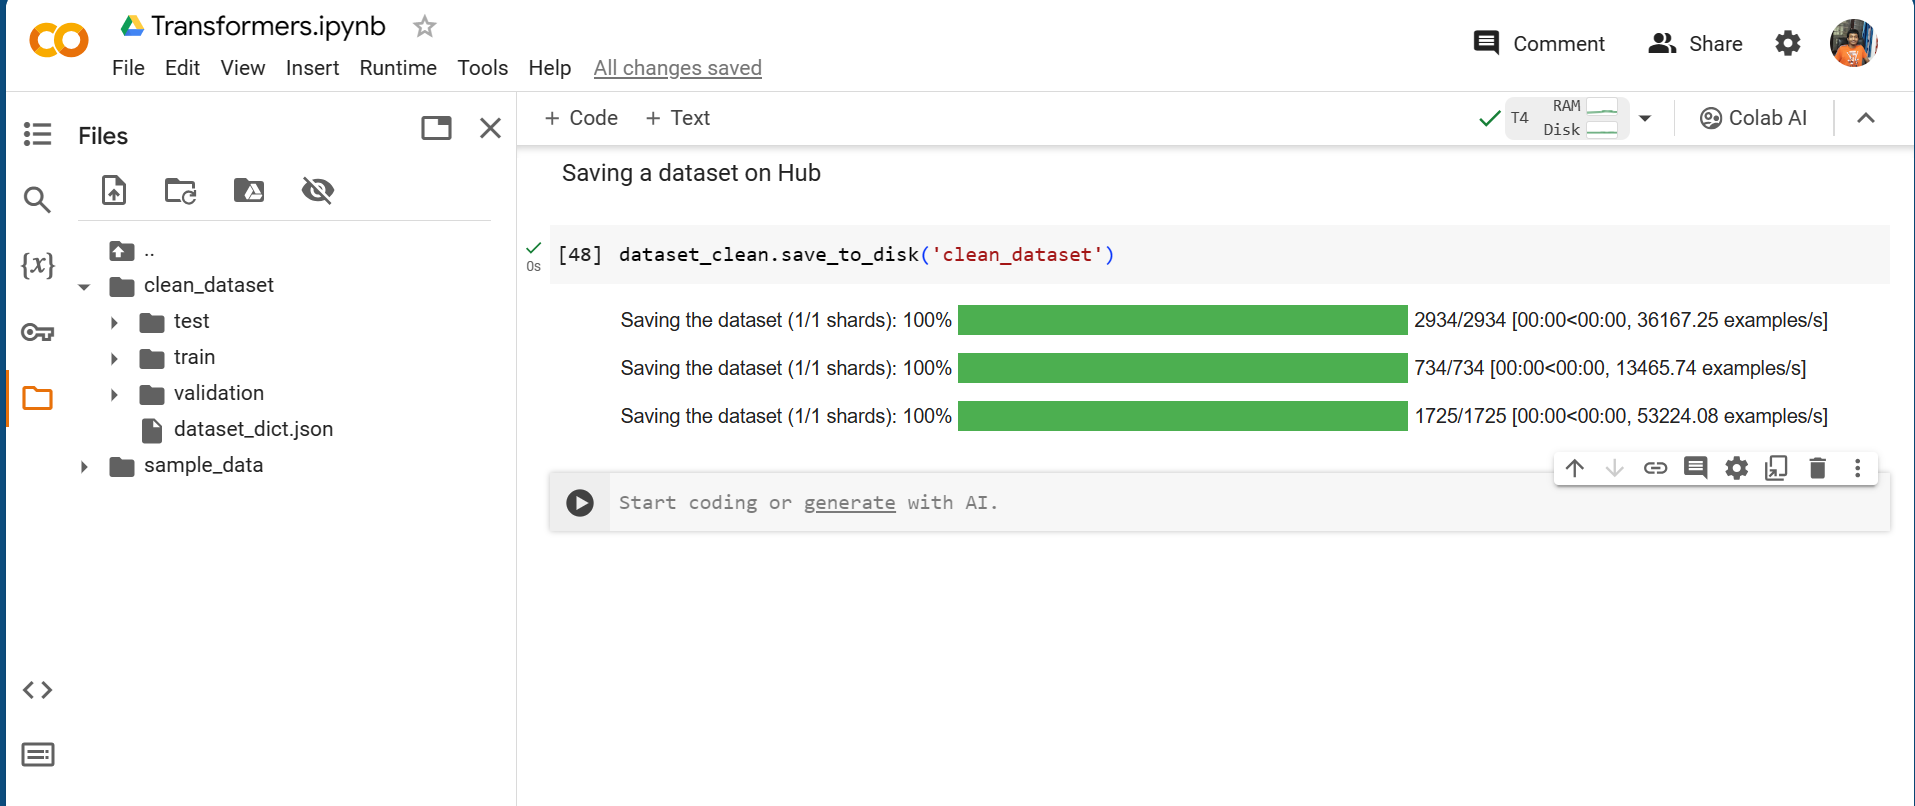

In [ ]:
from datasets import load_from_disk

dataset_reloaded = load_from_disk("clean_dataset")
dataset_reloaded

DatasetDict({
    train: Dataset({
        features: ['sentence1', 'sentence2', 'label', 'idx'],
        num_rows: 2934
    })
    validation: Dataset({
        features: ['sentence1', 'sentence2', 'label', 'idx'],
        num_rows: 734
    })
    test: Dataset({
        features: ['sentence1', 'sentence2', 'label', 'idx'],
        num_rows: 1725
    })
})

Dealing with Big Datasets

In [ ]:
!pip install zstandard

In [ ]:
from datasets import load_dataset

data_files = "https://the-eye.eu/public/AI/pile_preliminary_components/PUBMED_title_abstracts_2019_baseline.jsonl.zst"
pubmed_dataset = load_dataset("json", data_files=data_files, split="train")
pubmed_dataset

# We can see that there are 15,518,009 rows and 2 columns in our dataset

Simple way to measure memory

In [ ]:
!pip install psutil

In [ ]:
import psutil

# Process.memory_info is expressed in bytes, so convert to megabytes
print(f"RAM used: {psutil.Process().memory_info().rss / (1024 * 1024):.2f} MB")

RAM used: 649.64 MB


Dataset size

In [ ]:
print(f"Number of files in dataset : {pubmed_dataset.dataset_size}")
size_gb = pubmed_dataset.dataset_size / (1024**3)
print(f"Dataset size (cache file) : {size_gb:.2f} GB")

Number of files in dataset : 20979437051
Dataset size (cache file) : 19.54 GB


Note:
1. Despite it being almost 20 GB large, we’re able to load and access the dataset with much less RAM!

2. If you’re familiar with Pandas, this result might come as a surprise because of Wes Kinney’s famous rule of thumb that you typically need 5 to 10 times as much RAM as the size of your dataset.

3. 🤗 Datasets treats each dataset as a memory-mapped file, which provides a mapping between RAM and filesystem storage that allows the library to access and operate on elements of the dataset without needing to fully load it into memory.

Let’s run a little speed test by iterating over all the elements in the PubMed Abstracts dataset:

In [ ]:
import timeit

code_snippet = """batch_size = 1000

for idx in range(0, len(pubmed_dataset), batch_size):
    _ = pubmed_dataset[idx:idx + batch_size]
"""

time = timeit.timeit(stmt=code_snippet, number=1, globals=globals())
print(
    f"Iterated over {len(pubmed_dataset)} examples (about {size_gb:.1f} GB) in "
    f"{time:.1f}s, i.e. {size_gb/time:.3f} GB/s"
)

'Iterated over 15518009 examples (about 19.5 GB) in 64.2s, i.e. 0.304 GB/s'


You’ll typically be able to iterate over a dataset at speed of a few tenths of a GB/s to several GB/s.

This works great for the vast majority of applications, but sometimes you’ll have to work with a dataset that is too large to even store on your laptop’s hard drive. For example, if we tried to download the Pile in its entirety, we’d need 825 GB of free disk space! To handle these cases, 🤗 Datasets provides a streaming feature that allows us to download and access elements on the fly, without needing to download the whole dataset. Let’s take a look at how this works.

# Streaming datasets
https://huggingface.co/learn/nlp-course/chapter5/4?fw=pt#what-is-the-pile

Very well and easily explained

# Creating your own dataset

https://huggingface.co/learn/nlp-course/chapter5/5?fw=pt

# Semantic Search with FAISS

https://huggingface.co/learn/nlp-course/chapter5/6?fw=pt

# Part 6 - The Tokenizers Library
When you train a model from scratch on new data, you need a new tokenizer.

In [2]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 507.1/507.1 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 4.5 MB/s eta 0:00:00


In [3]:
from datasets import load_dataset

raw_datasets = load_dataset("code_search_net", "python")

/usr/local/lib/python3.10/dist-packages/datasets/load.py:1429: FutureWarning: The repository for code_search_net contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/code_search_net
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


Generating train split:   0%|          | 0/412178 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/22176 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/23107 [00:00<?, ? examples/s]

In [4]:
raw_datasets["train"]

Dataset({
    features: ['repository_name', 'func_path_in_repository', 'func_name', 'whole_func_string', 'language', 'func_code_string', 'func_code_tokens', 'func_documentation_string', 'func_documentation_tokens', 'split_name', 'func_code_url'],
    num_rows: 412178
})

In [5]:
print(raw_datasets["train"][123456]["whole_func_string"])

def core_properties(self):
        """
        Instance of |CoreProperties| holding the read/write Dublin Core
        document properties for this presentation. Creates a default core
        properties part if one is not present (not common).
        """
        try:
            return self.part_related_by(RT.CORE_PROPERTIES)
        except KeyError:
            core_props = CorePropertiesPart.default()
            self.relate_to(core_props, RT.CORE_PROPERTIES)
            return core_props


Generator

In [6]:
def get_training_corpus():
    dataset = raw_datasets["train"]
    for start_idx in range(0, len(dataset), 1000):
        samples = dataset[start_idx : start_idx + 1000]
        yield samples["whole_func_string"]
training_corpus = get_training_corpus()

Training a new tokenizer

In [7]:
from transformers import AutoTokenizer

old_tokenizer = AutoTokenizer.from_pretrained("gpt2") #gpt2 was pretrained on english data

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [11]:
example = '''def add_numbers(a, b):
    """Add the two numbers `a` and `b`."""
    return a + b'''
# Python language -> high version of english
tokens = old_tokenizer.tokenize(example)
print(list(tokens))

['def', 'Ġadd', '_', 'n', 'umbers', '(', 'a', ',', 'Ġb', '):', 'Ċ', 'Ġ', 'Ġ', 'Ġ', 'Ġ"""', 'Add', 'Ġthe', 'Ġtwo', 'Ġnumbers', 'Ġ`', 'a', '`', 'Ġand', 'Ġ`', 'b', '`', '."', '""', 'Ċ', 'Ġ', 'Ġ', 'Ġ', 'Ġreturn', 'Ġa', 'Ġ+', 'Ġb']


This tokenizer has a few special symbols, like Ġ and Ċ, which denote spaces and newlines, respectively.

Note : It does not capture indentation

In [12]:
tokenizer = old_tokenizer.train_new_from_iterator(training_corpus, 52000)

In [16]:
tokens = tokenizer.tokenize(example)
print(list(tokens))

['def', 'Ġadd', '_', 'numbers', '(', 'a', ',', 'Ġb', '):', 'ĊĠĠĠ', 'Ġ"""', 'Add', 'Ġthe', 'Ġtwo', 'Ġnumbers', 'Ġ`', 'a', '`', 'Ġand', 'Ġ`', 'b', '`."""', 'ĊĠĠĠ', 'Ġreturn', 'Ġa', 'Ġ+', 'Ġb']


In [14]:
print(len(tokens))
print(len(old_tokenizer.tokenize(example)))

27
36


In [18]:
example = """class LinearLayer():
    def __init__(self, input_size, output_size):
        self.weight = torch.randn(input_size, output_size)
        self.bias = torch.zeros(output_size)

    def __call__(self, x):
        return x @ self.weights + self.bias
    """
print(list(tokenizer.tokenize(example)))

['class', 'ĠLinear', 'Layer', '():', 'ĊĠĠĠ', 'Ġdef', 'Ġ__', 'init', '__(', 'self', ',', 'Ġinput', '_', 'size', ',', 'Ġoutput', '_', 'size', '):', 'ĊĠĠĠĠĠĠĠ', 'Ġself', '.', 'weight', 'Ġ=', 'Ġtorch', '.', 'randn', '(', 'input', '_', 'size', ',', 'Ġoutput', '_', 'size', ')', 'ĊĠĠĠĠĠĠĠ', 'Ġself', '.', 'bias', 'Ġ=', 'Ġtorch', '.', 'zeros', '(', 'output', '_', 'size', ')', 'ĊĊĠĠĠ', 'Ġdef', 'Ġ__', 'call', '__(', 'self', ',', 'Ġx', '):', 'ĊĠĠĠĠĠĠĠ', 'Ġreturn', 'Ġx', 'Ġ@', 'Ġself', '.', 'weights', 'Ġ+', 'Ġself', '.', 'bias', 'ĊĠĠĠĠ']


'ĊĠĠĠĠĠĠĠ' -> double indentation, it ables to capture

Saving the tokenizer

In [19]:
tokenizer.save_pretrained("code-search-net-tokenizer")

('code-search-net-tokenizer/tokenizer_config.json',
 'code-search-net-tokenizer/special_tokens_map.json',
 'code-search-net-tokenizer/vocab.json',
 'code-search-net-tokenizer/merges.txt',
 'code-search-net-tokenizer/added_tokens.json',
 'code-search-net-tokenizer/tokenizer.json')

We can also push this tokenizer to hub

In [20]:
from huggingface_hub import notebook_login

notebook_login()

In [22]:
tokenizer.push_to_hub("code-search-net-tokenizer")

CommitInfo(commit_url='https://huggingface.co/neural-net-rahul/code-search-net-tokenizer/commit/166f9137a0471cb47c3ae9fffc22d4dac914d018', commit_message='Upload tokenizer', commit_description='', oid='166f9137a0471cb47c3ae9fffc22d4dac914d018', pr_url=None, pr_revision=None, pr_num=None)

Loading the tokenizer again from hub

In [23]:
tokenizer = AutoTokenizer.from_pretrained("neural-net-rahul/code-search-net-tokenizer")

tokenizer_config.json:   0%|          | 0.00/440 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/822k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/467k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.17M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/99.0 [00:00<?, ?B/s]

# Fast tokenizers
By default tokenizers are fast tokenizers

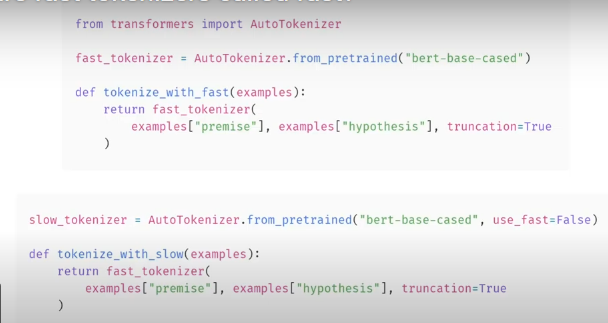

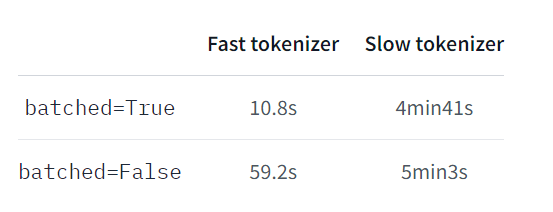

In [24]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")
example = "My name is Sylvain and I work at Hugging Face in Brooklyn."
encoding = tokenizer(example)
print(type(encoding))

tokenizer_config.json:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

<class 'transformers.tokenization_utils_base.BatchEncoding'>


In [25]:
tokenizer.is_fast

True

In [26]:
encoding.is_fast

True

In [28]:
print(list(encoding.tokens()))

['[CLS]', 'My', 'name', 'is', 'S', '##yl', '##va', '##in', 'and', 'I', 'work', 'at', 'Hu', '##gging', 'Face', 'in', 'Brooklyn', '.', '[SEP]']


In [29]:
encoding.word_ids()

[None, 0, 1, 2, 3, 3, 3, 3, 4, 5, 6, 7, 8, 8, 9, 10, 11, 12, None]

In [30]:
start, end = encoding.word_to_chars(3)
example[start:end]

'Sylvain'

# Normalization and Pre tokenization

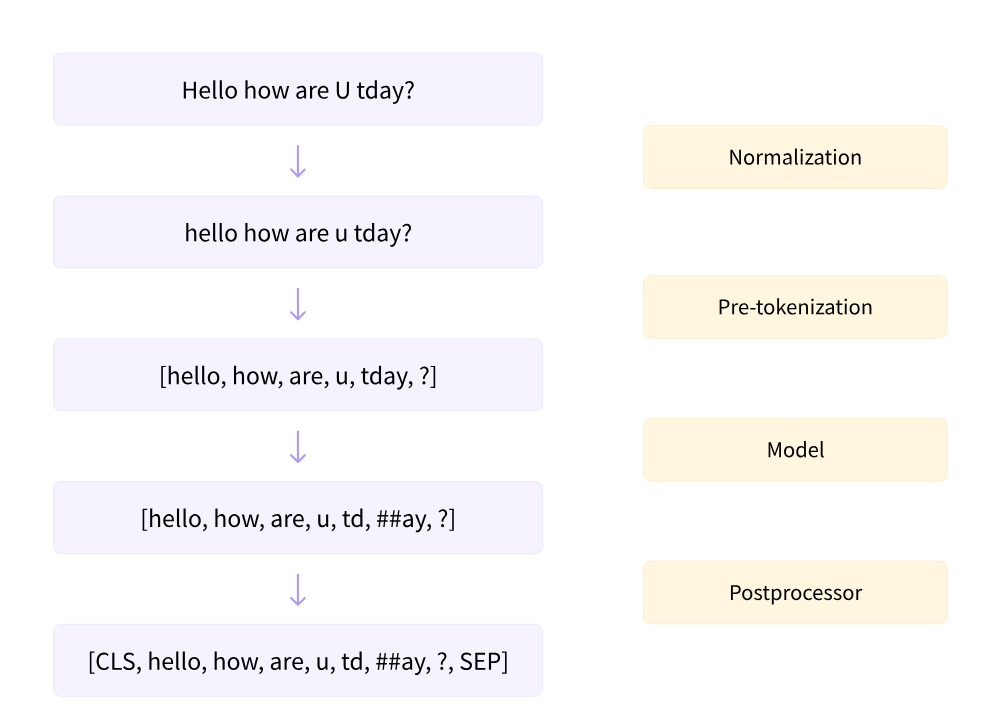

Normalization

The normalization step involves some general cleanup, such as removing needless whitespace, lowercasing, and/or removing accents.

In [4]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
print(type(tokenizer.backend_tokenizer))

tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

<class 'tokenizers.Tokenizer'>


In [5]:
print(tokenizer.backend_tokenizer.normalizer.normalize_str("Héllò hôw are ü?"))

hello how are u?


Pre-tokenization

We first need to split the texts into small entities, like words.

In [6]:
tokenizer.backend_tokenizer.pre_tokenizer.pre_tokenize_str("Hello, how are  you?")

[('Hello', (0, 5)),
 (',', (5, 6)),
 ('how', (7, 10)),
 ('are', (11, 14)),
 ('you', (16, 19)),
 ('?', (19, 20))]

Since we’re using a BERT tokenizer, the pre-tokenization involves splitting on whitespace and punctuation. Other tokenizers can have different rules for this step. For example, if we use the GPT-2 tokenizer:

In [7]:
tokenizer = AutoTokenizer.from_pretrained("gpt2")
tokenizer.backend_tokenizer.pre_tokenizer.pre_tokenize_str("Hello, how are  you?")

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

[('Hello', (0, 5)),
 (',', (5, 6)),
 ('Ġhow', (6, 10)),
 ('Ġare', (10, 14)),
 ('Ġ', (14, 15)),
 ('Ġyou', (15, 19)),
 ('?', (19, 20))]

it will split on whitespace and punctuation as well, but it will keep the spaces and replace them with a Ġ symbol, enabling it to recover the original spaces if we decode the tokens

For a last example, let’s have a look at the T5 tokenizer, which is based on the SentencePiece algorithm:

T5 tokenizer only splits on whitespace, not punctuation

Also note that it added a space by default at the beginning of the sentence (before Hello) and ignored the double space between are and you.

In [8]:
tokenizer = AutoTokenizer.from_pretrained("t5-small")
tokenizer.backend_tokenizer.pre_tokenizer.pre_tokenize_str("Hello, how are  you?")

tokenizer_config.json:   0%|          | 0.00/2.32k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

[('▁Hello,', (0, 6)),
 ('▁how', (7, 10)),
 ('▁are', (11, 14)),
 ('▁you?', (16, 20))]

In the following sections, we’ll dive into the three main subword tokenization algorithms: BPE (used by GPT-2 and others), WordPiece (used for example by BERT), and Unigram (used by T5 and others).

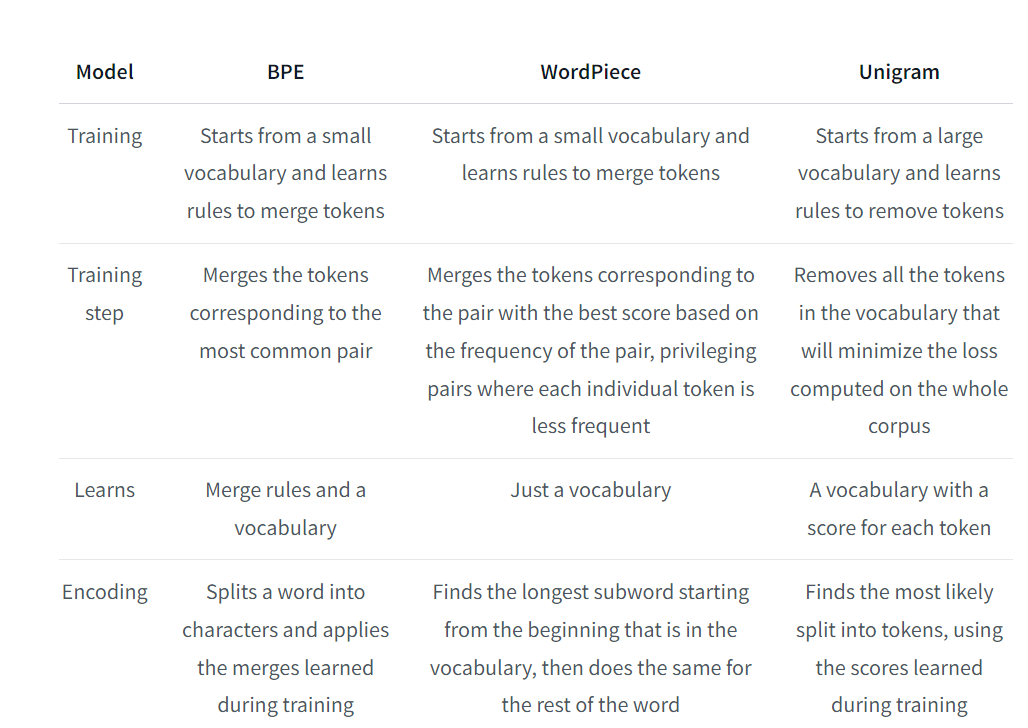